In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ocean = pd.read_csv("Data_Level5_BAH_OceanCleanup.csv")

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
for i in range(0,len(ocean)):
    if ocean.at[i,'State'] == "United States":
        ocean.at[i,'State'] = "California, USA"

ocean = ocean[ocean.State != "Ontario, Canada"]

In [31]:
stateStats = dict()
typeStats = dict()
#[pounds,miles,people,activities]

for index, row in ocean.iterrows():
    state = str(row['State'])
    cType = row['Cleanup Type']
    
    if state not in stateStats.keys():
        stateStats[state] = [0,0,0,0]
        
    stateStats[state][0] += row['Pounds']
    stateStats[state][1] += row['Miles']
    stateStats[state][2] += row['People']
    stateStats[state][3] += 1

    if cType not in typeStats.keys():
        typeStats[cType] = [0,0,0,0]
        
    typeStats[cType][0] += row['Pounds']
    typeStats[cType][1] += row['Miles']
    typeStats[cType][2] += row['People']
    typeStats[cType][3] += 1
    
del stateStats['nan']
del typeStats[np.NaN]

In [32]:
stateStats_sorted = sorted(stateStats.items())
typeStats_sorted = sorted(typeStats.items())

In [72]:
states = list()
pounds = list()
miles = list()
people = list()
activities = list()
ppp = list()
ppm = list()
ppa = list()

for key,value in stateStats_sorted:
    states.append(key)
    pounds.append(value[0])
    miles.append(value[1])
    people.append(value[2])
    ppp.append(value[0]/value[2])
    ppm.append(value[0]/value[1])
    ppa.append(value[0]/value[3])
    activities.append(value[3])

In [73]:
pcDict = {'State':states,'Pounds':pounds,'Miles':miles,'People':people,'Activities':activities,'PPP':ppp,'PPM':ppm,'PPA':ppa}

df = pd.DataFrame(pcDict,columns=['State','Pounds','People','Activities','PPP','PPM','PPA'])

In [74]:
df

,State,Pounds,People,Activities,PPP,PPM,PPA
0,"Alabama, USA",8.980525e+04,11279.0,197,7.962164,120.540012,455.864213
1,"Alaska, USA",7.491390e+03,1532.0,163,4.889941,29.216815,45.959448
2,"Arizona, USA",4.715781e+05,3167.0,88,148.903712,7897.978930,5358.841529
3,"Arkansas, USA",2.164500e+03,208.0,4,10.406250,29.650685,541.125000
4,"California, USA",2.448678e+06,222591.0,9334,11.000797,184.652332,262.339664
5,"Colorado, USA",9.971965e+04,8213.0,132,12.141684,443.089149,755.451894
6,"Connecticut, USA",5.807116e+04,7138.0,407,8.135495,113.657561,142.680983
7,"Delaware, USA",2.188025e+04,3890.0,331,5.624743,60.791509,66.103474
8,"District of Columbia, USA",1.874299e+04,2891.0,371,6.483222,127.719445,50.520201
9,"Florida, USA",1.095684e+06,95832.0,11319,11.433383,79.339792,96.800416


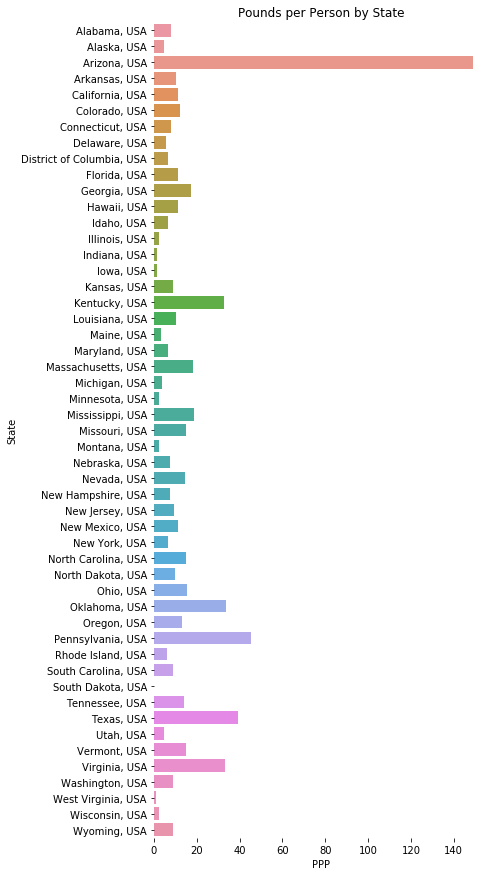

In [60]:
f, ax = plt.subplots(figsize=(6, 15))
ax = sns.barplot(y='State',x='PPP',data=df[['State','PPP']])
ax.set(title='Pounds per Person by State')
sns.despine(left=True, bottom=True)

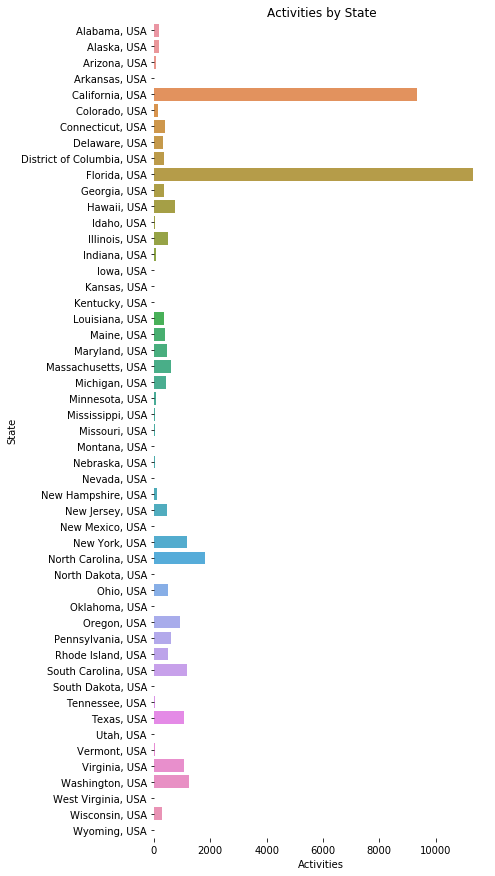

In [67]:
f, ax = plt.subplots(figsize=(6, 15))
ax = sns.barplot(y='State',x='Activities',data=df[['State','Activities']])
ax.set(title='Activities by State')
sns.despine(left=True, bottom=True)

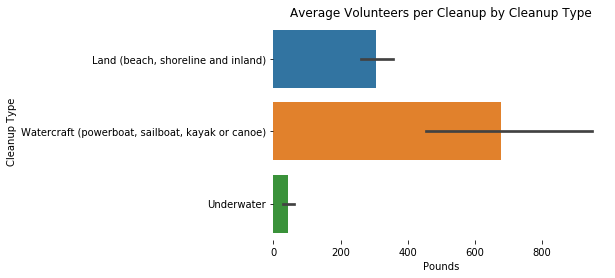

In [63]:
ax = sns.barplot(x='Pounds',y='Cleanup Type',data=ocean[['Cleanup Type','Pounds']])
ax.set(title='Average Volunteers per Cleanup by Cleanup Type')
sns.despine(left=True, bottom=True)

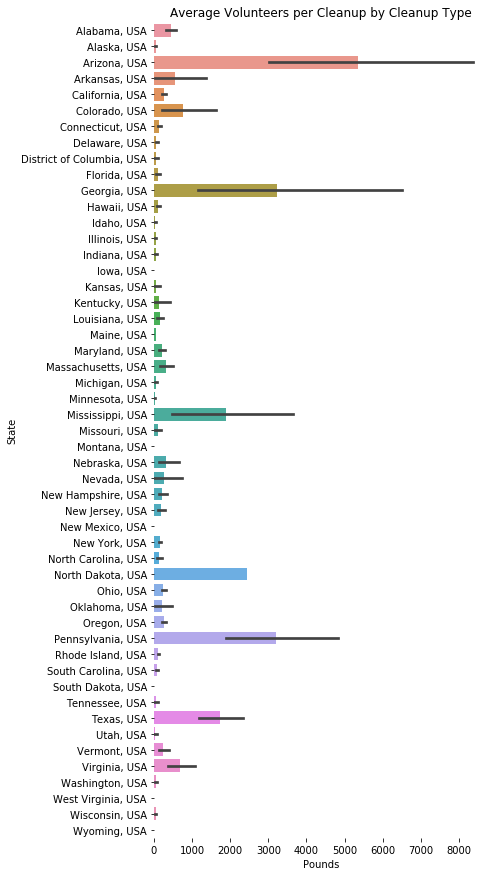

In [65]:
f, ax = plt.subplots(figsize=(6, 15))
ax = sns.barplot(x='Pounds',y='State',data=ocean[['State','Pounds']],order=states)
ax.set(title='Average Volunteers per Cleanup by Cleanup Type')
sns.despine(left=True, bottom=True)